In [4]:
import pandas as pd
import matplotlib.pyplot as plt




url = "https://raw.githubusercontent.com/Rohanrathod7/my-ds-projects/main/02_data_manipulation/sales_dashboard_pandas/Data/superstore.csv"
df = pd.read_csv(url, parse_dates=["Order.Date", 'Ship.Date'])

# ✅ Preview the data
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07,CA-2011-130813,...,19,Consumer,2011-01-09,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21,CA-2011-148614,...,19,Consumer,2011-01-26,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05,CA-2011-118962,...,21,Consumer,2011-08-09,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05,CA-2011-118962,...,111,Consumer,2011-08-09,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29,CA-2011-146969,...,6,Consumer,2011-10-03,Standard Class,1.32,California,Paper,2011,North America,40


In [5]:
total_sales = df["Sales"].sum()
print(f"✅ Total Sales: ₹{total_sales:,.2f}")


✅ Total Sales: ₹12,642,905.00


In [7]:
sales_product = df.groupby("Product.Name")["Sales"].sum().sort_values(ascending=False)
sales_product.head(10)


,Sales
Product.Name,
"Apple Smart Phone, Full Size",86936
"Cisco Smart Phone, Full Size",76441
"Motorola Smart Phone, Full Size",73159
"Nokia Smart Phone, Full Size",71904
Canon imageCLASS 2200 Advanced Copier,61600
"Hon Executive Leather Armchair, Adjustable",58200
"Office Star Executive Leather Armchair, Adjustable",50667
"Harbour Creations Executive Leather Armchair, Adjustable",50120
"Samsung Smart Phone, Cordless",48654


In [8]:
sales_region = df.groupby("Region")["Sales"].sum()
sales_region


,Sales
Region,
Africa,783776
Canada,66932
Caribbean,324281
Central,2822399
Central Asia,752839
EMEA,806184
East,678834
North,1248192
North Asia,848349


In [9]:
sales_category = df.groupby("Category")["Sales"].sum()
sales_category


,Sales
Category,
Furniture,4110884
Office Supplies,3787330
Technology,4744691


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


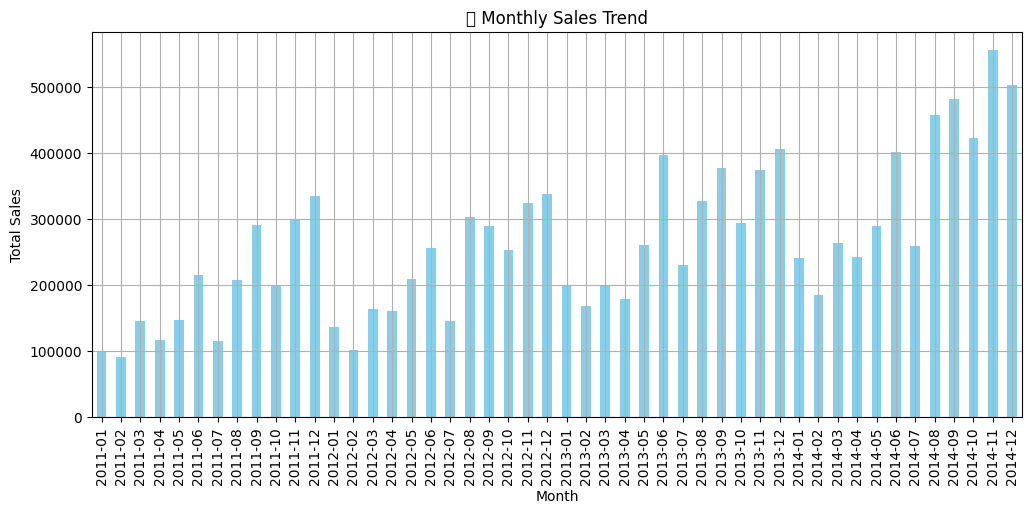

In [11]:
df["Month"] = df["Order.Date"].dt.to_period("M")
monthly_sales = df.groupby("Month")["Sales"].sum()

monthly_sales.plot(kind='bar', figsize=(12, 5), color='skyblue')
plt.title("📈 Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


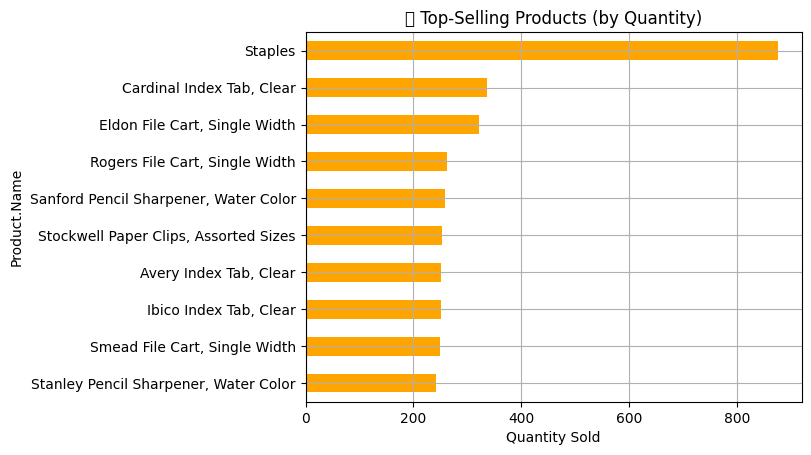

In [13]:
top_products = df.groupby("Product.Name")["Quantity"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', color='orange')
plt.title("🏆 Top-Selling Products (by Quantity)")
plt.xlabel("Quantity Sold")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()
